In [1]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog,messagebox
from PIL import Image,ImageTk
import matplotlib.pyplot as plt

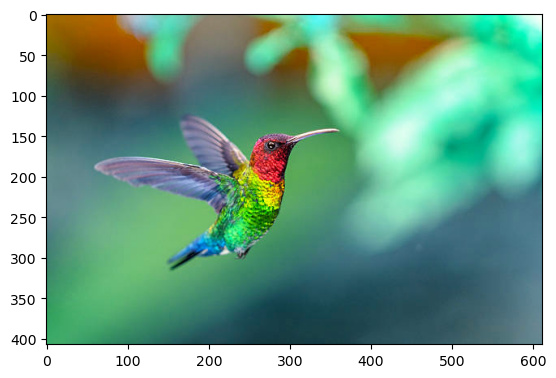

In [12]:
# Image Importing 
image=cv2.imread('bird.jpg')
plt.imshow(image)

# Image Sketching

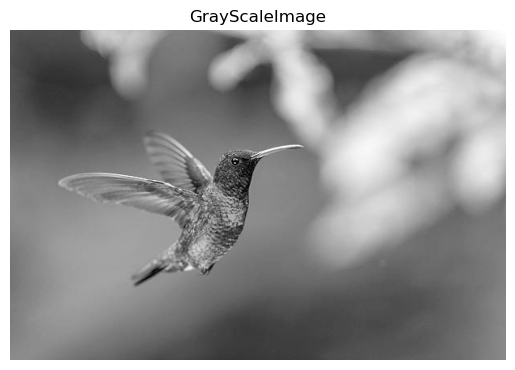

In [3]:
#image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#cv2.imshow('GrayScaleImage',image_gray)
#cv2.waitKey(0)
plt.title("GrayScaleImage")
plt.axis("off")
plt.imshow(image_gray,cmap='gray')

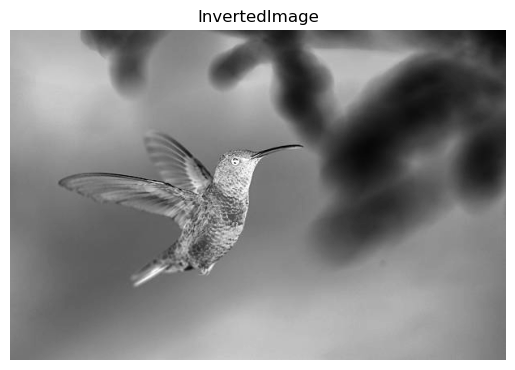

In [4]:
inverted_image=cv2.bitwise_not(image_gray)

plt.title("InvertedImage")
plt.axis("off")
plt.imshow(inverted_image,cmap='gray')

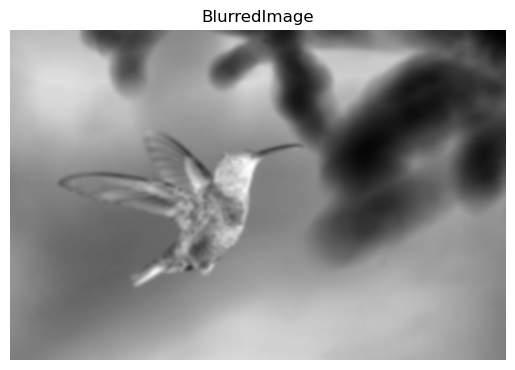

In [74]:
kernel_size=(11,11)
blurred_image=cv2.GaussianBlur(inverted_image,kernel_size,sigmaX=0,sigmaY=0)
plt.title("BlurredImage")
plt.axis("off")
plt.imshow(blurred_image,cmap='gray')

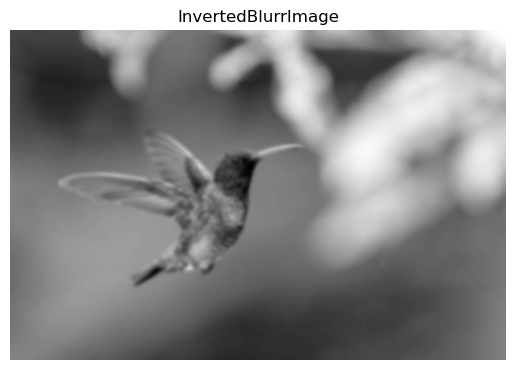

In [76]:
inverted_blurr_image=cv2.bitwise_not(blurred_image)

plt.title("InvertedBlurrImage")
plt.axis("off")
plt.imshow(inverted_blurr_image,cmap='gray')

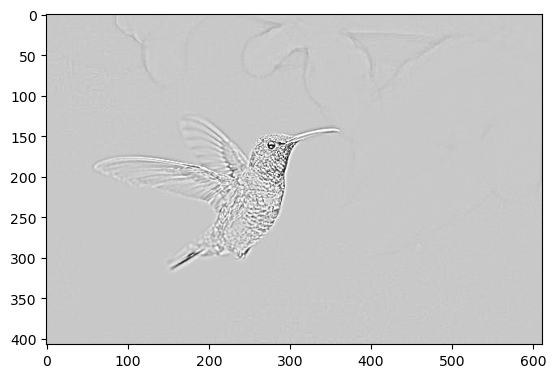

In [78]:
sketch_image=cv2.divide(image_gray,inverted_blurr_image,scale=200.0)
plt.imshow(sketch_image,cmap='gray')

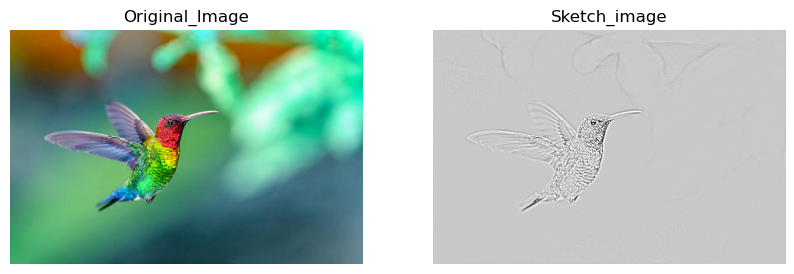

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Original_Image")
plt.imshow(image)
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Sketch_image")
plt.imshow(sketch_image,cmap='gray')

# Image Thresholding

In [153]:
_, global_binary_image = cv2.threshold(image_gray, 127, 1, cv2.THRESH_BINARY)
_

127.0

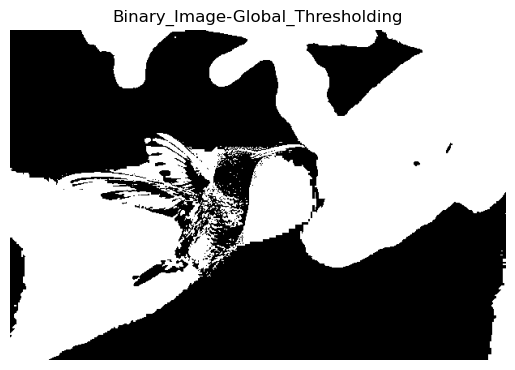

In [155]:
plt.imshow(global_binary_image, cmap='gray')
plt.title('Binary_Image-Global_Thresholding')
plt.axis('off')
plt.show()

In [157]:
adaptive_binary_image = cv2.adaptiveThreshold(image_gray, 1, 
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 
                                     blockSize=11,  # Size of local neighborhood
                                     C=2)

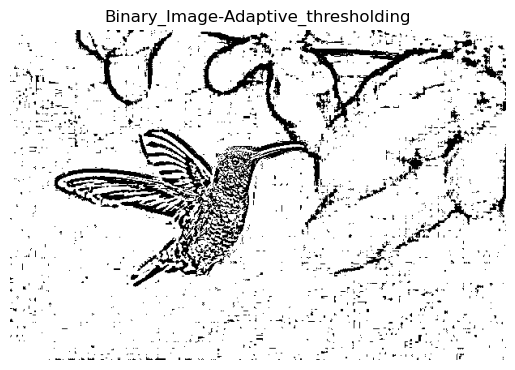

In [159]:
plt.imshow(adaptive_binary_image, cmap='gray')
plt.title('Binary_Image-Adaptive_thresholding')
plt.axis('off')
plt.show()

# Feature Matching

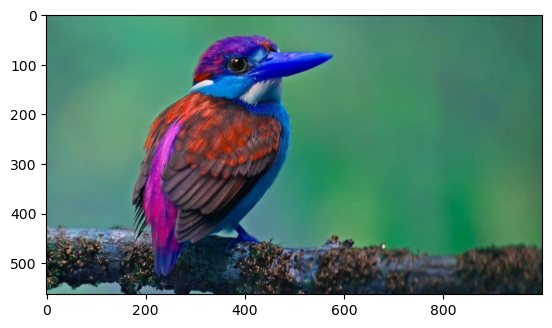

In [167]:
image2=cv2.imread('bird2.jpg')
plt.imshow(image2)

In [169]:
orb=cv2.ORB_create()

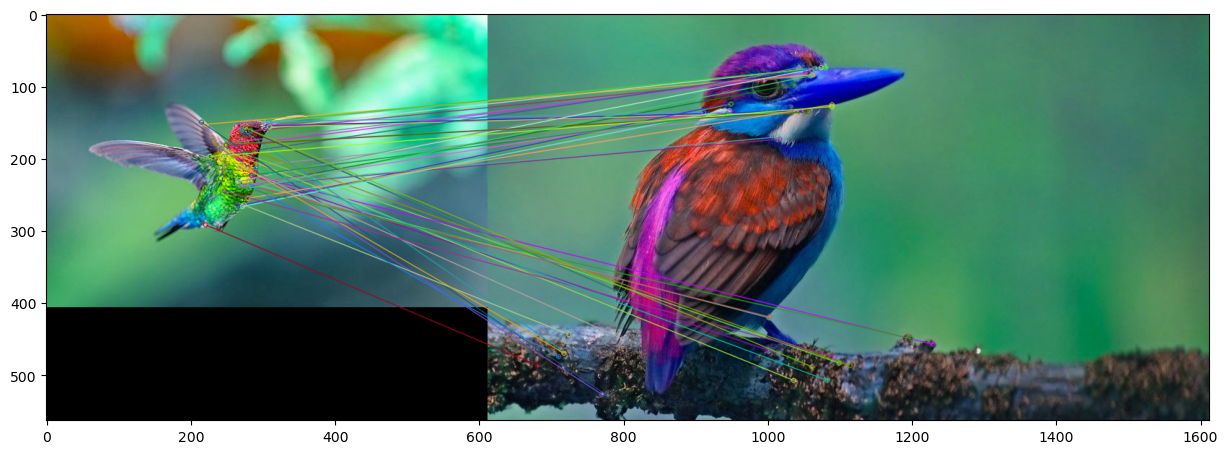

In [194]:
keypoints1, descriptors1 = orb.detectAndCompute(image, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)
    
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
    
matches = sorted(matches, key = lambda x:x.distance)
    
img_matches = cv2.drawMatches(image, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
#cv2.imshow('Feature Matching', img_matches)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.figure(figsize=(15,12))
plt.imshow(img_matches)

In [219]:
_ , threshold=cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)

In [225]:
opening=cv2.morphologyEx(threshold,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg=cv2.dilate(opening,kernel,iterations=3)

In [227]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

In [229]:
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

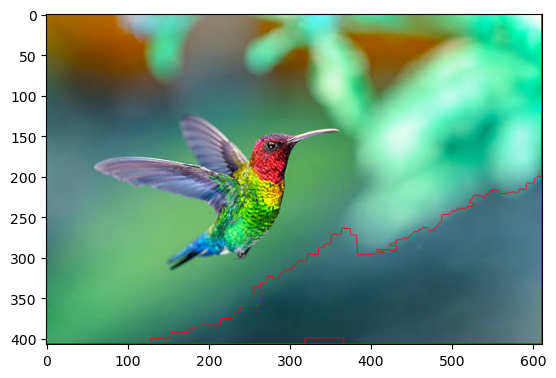

In [231]:
plt.imshow(image)